In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
!pip install citipy

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hasaki jp
hasaki jp
kapaa us
atuona pf
espanola us
georgetown sh
kapaa us
omsukchan ru
ushuaia ar
eenhana na
rikitea pf
kurumkan ru
cape town za
kodiak us
kapaa us
pevek ru
aripuana br
walvis bay na
rikitea pf
punta arenas cl
namibe ao
albany au
bredasdorp za
padang id
atuona pf
east london za
champerico gt
ushuaia ar
kholodnyy ru
hobart au
bilibino ru
poum nc
hilo us
kenora ca
comodoro rivadavia ar
pevek ru
jamestown sh
nikolskoye ru
east bethel us
pevek ru
norman wells ca
atuona pf
nikolskoye ru
tuktoyaktuk ca
rikitea pf
victoria sc
sitka us
kem ru
talnakh ru
hobart au
araguacu br
alofi nu
coahuayana mx
busselton au
namibe ao
busselton au
yirol sd
dunmore east ie
bethel us
lebu cl
the valley ai
bur gabo so
taolanaro mg
eldikan ru
juneau us
yantal ru
rathenow de
kuytun ru
nome us
cockburn town bs
kavieng pg
balkanabat tm
hobart au
juba sd
butaritari ki
punta arenas cl
paso de los toros uy
taolanaro mg
rikitea pf
flin flon ca
barma sl
broome au
tasiilaq gl
cidreira br
westport ie
sprin

east london za
castro cl
cape town za
victoria sc
puerto ayora ec
los llanos de aridane es
kampot kh
bathsheba bb
pacific grove us
longyearbyen sj
cherskiy ru
bridlington gb
port alfred za
saskatoon ca
doha kw
finnsnes no
mataura pf
kavieng pg
upernavik gl
hobart au
ushuaia ar
albany au
rikitea pf
borba br
puerto ayora ec
punta arenas cl
kruisfontein za
port alfred za
kapaa us
umzimvubu za
hobart au
saint-philippe re
busselton au
vilyuysk ru
doka sd
bengkulu id
jamestown sh
tambul sd
cape town za
castro cl
kodiak us
cururupu br
tabiauea ki
codrington ag
mandalgovi mn
mar del plata ar
kaitangata nz
inderborskiy kz
nizhneyansk ru
camacha pt
ushuaia ar
nikolskoye ru
dujuma so
rikitea pf
hermanus za
taolanaro mg
punta arenas cl
kaitangata nz
dikson ru
tasiilaq gl
san felipe mx
sur om
vila franca do campo pt
busselton au
illoqqortoormiut gl
pevek ru
port alfred za
talmenka ru
punta arenas cl
bethel us
mecca sa
ribeira grande pt
honiara sb
nikolskoye ru
sorland no
tsihombe mg
chuy uy
mehamn 

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [8]:
#cca32e91bb60176843ae3a498d42fcb5

In [9]:
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cca32e91bb60176843ae3a498d42fcb5


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 47.77,
  'feels_like': 45.59,
  'temp_min': 45.95,
  'temp_max': 50.11,
  'pressure': 1006,
  'humidity': 93},
 'visibility': 9656,
 'wind': {'speed': 5.01, 'deg': 40, 'gust': 17},
 'clouds': {'all': 90},
 'dt': 1635356661,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1635333092,
  'sunset': 1635371064},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Get the JSON data.
boston_data = city_weather.json()

In [13]:
boston_data['sys']["country"]

'US'

In [14]:
boston_data["dt"]

1635356661

In [15]:
boston_data["coord"]["lat"]

42.3584

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 50.11 93 90 5.01


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-10-27 17:44:21'

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | espanola
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | omsukchan
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | eenhana
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kurumkan
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | aripuana
Processing Record 15 of Set 1 | walvis bay
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | padang
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | champerico
Processing Record 23 of Set 1 | kholodnyy
Processin

Processing Record 41 of Set 4 | port hardy
Processing Record 42 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 4 | dakar
Processing Record 44 of Set 4 | akdepe
Processing Record 45 of Set 4 | vostok
Processing Record 46 of Set 4 | sabha
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | robertsport
Processing Record 49 of Set 4 | kanchanaburi
Processing Record 50 of Set 4 | carnarvon
Processing Record 1 of Set 5 | seymchan
Processing Record 2 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 3 of Set 5 | erenhot
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | darab
Processing Record 6 of Set 5 | alyangula
Processing Record 7 of Set 5 | saint anthony
Processing Record 8 of Set 5 | mlonggo
Processing Record 9 of Set 5 | opotiki
Processing Record 10 of Set 5 | barawe
City not found. Skipping...
Processing Record 11 of Set 5 | kui buri
Pr

City not found. Skipping...
Processing Record 27 of Set 8 | cururupu
Processing Record 28 of Set 8 | codrington
Processing Record 29 of Set 8 | mandalgovi
Processing Record 30 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 31 of Set 8 | camacha
Processing Record 32 of Set 8 | dujuma
City not found. Skipping...
Processing Record 33 of Set 8 | san felipe
Processing Record 34 of Set 8 | talmenka
Processing Record 35 of Set 8 | mecca
Processing Record 36 of Set 8 | honiara
Processing Record 37 of Set 8 | sorland
Processing Record 38 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 8 | negombo
Processing Record 40 of Set 8 | huazolotitlan
City not found. Skipping...
Processing Record 41 of Set 8 | kosh-agach
Processing Record 42 of Set 8 | tulca
Processing Record 43 of Set 8 | san cristobal
Processing Record 44 of Set 8 | komsomolskiy
Processing Record 45 of Set 8 | noshiro
Processing Record 46 of Set 8 | praya
Processing Record 47 of Set 8 | avera
Pro

Processing Record 13 of Set 12 | waingapu
Processing Record 14 of Set 12 | keetmanshoop
Processing Record 15 of Set 12 | viransehir
Processing Record 16 of Set 12 | deputatskiy
Processing Record 17 of Set 12 | rosario
Processing Record 18 of Set 12 | shiraz
Processing Record 19 of Set 12 | treinta y tres
Processing Record 20 of Set 12 | mackay
Processing Record 21 of Set 12 | ca mau
Processing Record 22 of Set 12 | am timan
Processing Record 23 of Set 12 | afua
Processing Record 24 of Set 12 | gat
Processing Record 25 of Set 12 | san policarpo
Processing Record 26 of Set 12 | kropotkin
Processing Record 27 of Set 12 | manono
Processing Record 28 of Set 12 | marathon
Processing Record 29 of Set 12 | lata
Processing Record 30 of Set 12 | tshikapa
Processing Record 31 of Set 12 | savannakhet
Processing Record 32 of Set 12 | copiapo
Processing Record 33 of Set 12 | nara
Processing Record 34 of Set 12 | halalo
City not found. Skipping...
Processing Record 35 of Set 12 | san luis
Processing 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,57.60,88,99,8.10,JP,2021-10-27 17:45:46
1,Kapaa,22.0752,-159.3190,73.18,96,1,5.75,US,2021-10-27 17:45:46
2,Atuona,-9.8000,-139.0333,77.54,70,32,16.04,PF,2021-10-27 17:45:46
3,Espanola,35.9911,-106.0806,57.63,24,0,9.93,US,2021-10-27 17:45:47
4,Georgetown,5.4112,100.3354,80.55,93,40,3.00,MY,2021-10-27 17:45:47
5,Omsukchan,62.5333,155.8000,-2.22,97,76,4.61,RU,2021-10-27 17:45:47
6,Ushuaia,-54.8000,-68.3000,55.06,41,20,14.97,AR,2021-10-27 17:43:31
7,Eenhana,-17.4667,16.3333,73.89,54,98,4.59,NA,2021-10-27 17:45:48
8,Rikitea,-23.1203,-134.9692,73.29,78,83,6.44,PF,2021-10-27 17:45:48
9,Kurumkan,54.3000,110.3000,32.70,78,55,3.94,RU,2021-10-27 17:45:49


In [20]:
#Changing column order

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2021-10-27 17:45:46,35.7333,140.8333,57.60,88,99,8.10
1,Kapaa,US,2021-10-27 17:45:46,22.0752,-159.3190,73.18,96,1,5.75
2,Atuona,PF,2021-10-27 17:45:46,-9.8000,-139.0333,77.54,70,32,16.04
3,Espanola,US,2021-10-27 17:45:47,35.9911,-106.0806,57.63,24,0,9.93
4,Georgetown,MY,2021-10-27 17:45:47,5.4112,100.3354,80.55,93,40,3.00
5,Omsukchan,RU,2021-10-27 17:45:47,62.5333,155.8000,-2.22,97,76,4.61
6,Ushuaia,AR,2021-10-27 17:43:31,-54.8000,-68.3000,55.06,41,20,14.97
7,Eenhana,NA,2021-10-27 17:45:48,-17.4667,16.3333,73.89,54,98,4.59
8,Rikitea,PF,2021-10-27 17:45:48,-23.1203,-134.9692,73.29,78,83,6.44
9,Kurumkan,RU,2021-10-27 17:45:49,54.3000,110.3000,32.70,78,55,3.94


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

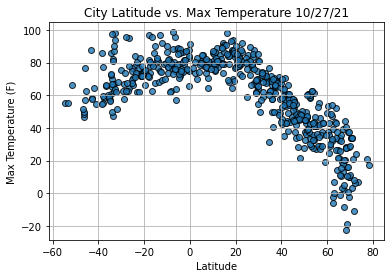

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

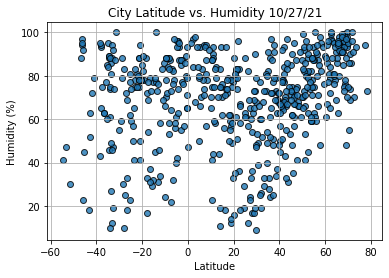

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

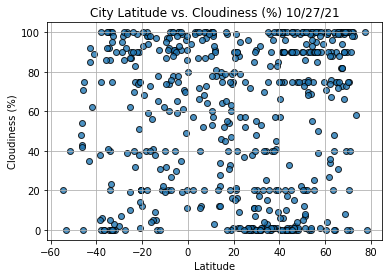

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

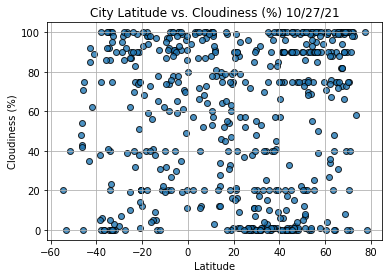

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                     Aripuana
Country                        BR
Date          2021-10-27 17:45:50
Lat                       -9.1667
Lng                      -60.6333
Max Temp                    82.26
Humidity                       72
Cloudiness                     97
Wind Speed                   3.02
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
547     True
548     True
549     True
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2021-10-27 17:45:46,35.7333,140.8333,57.60,88,99,8.10
1,Kapaa,US,2021-10-27 17:45:46,22.0752,-159.3190,73.18,96,1,5.75
3,Espanola,US,2021-10-27 17:45:47,35.9911,-106.0806,57.63,24,0,9.93
4,Georgetown,MY,2021-10-27 17:45:47,5.4112,100.3354,80.55,93,40,3.00
5,Omsukchan,RU,2021-10-27 17:45:47,62.5333,155.8000,-2.22,97,76,4.61


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

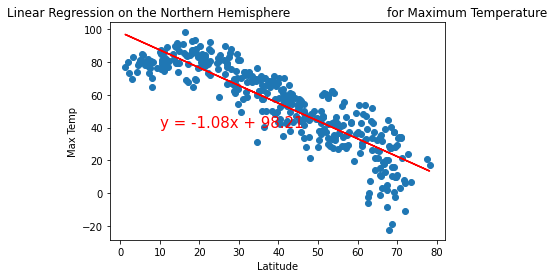

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))



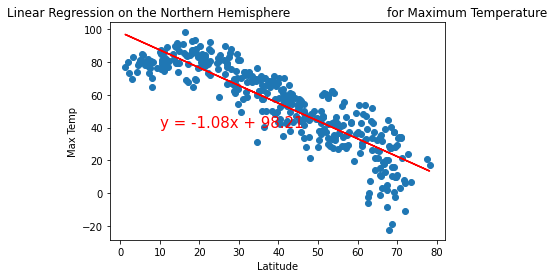

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


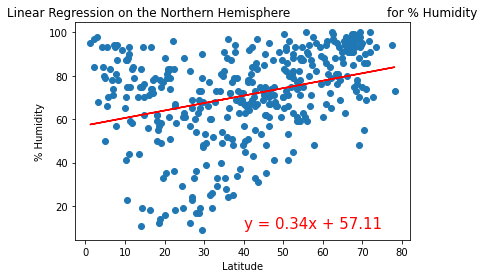

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


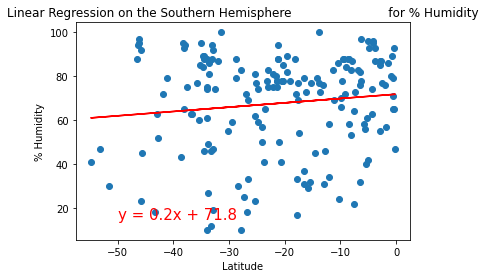

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

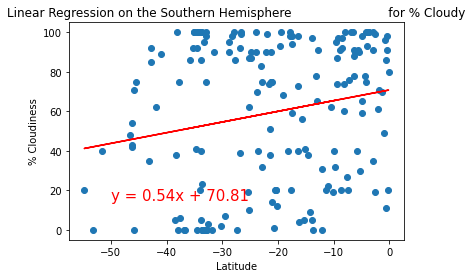

In [39]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudy', '% Cloudiness',(-50,15))

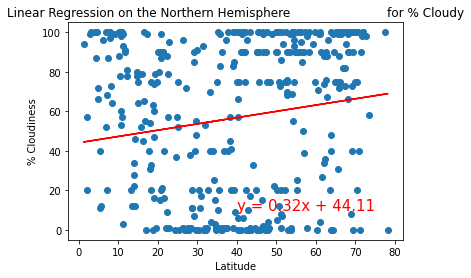

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudy', '% Cloudiness',(40,10))

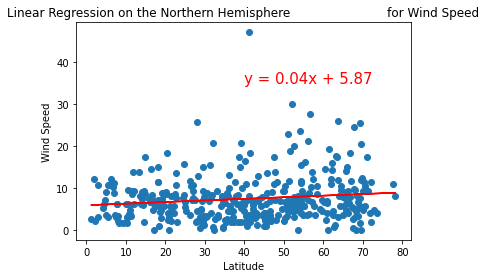

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

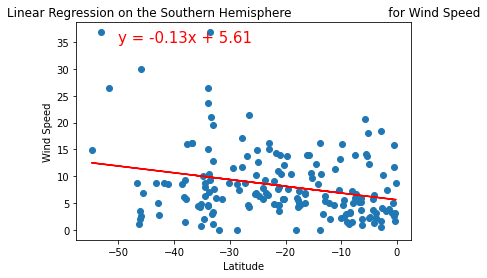

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))


In [53]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq
(slope, intercept, r_value, p_value, std_err) 

(-0.1258614312265254,
 5.606068112083729,
 -0.2671541496380549,
 0.00038058448651395277,
 0.03471792239483433)